In [1]:
!pip3 install matplotlib
!pip3 install tensorflow
!pip3 install scikit-learn

In [2]:
from keras.datasets import fashion_mnist

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
(x_train1_full, y_train1_full),( x_test_full, y_test_full) = fashion_mnist.load_data()





#splitting data
x_train_full , x_val_full, y_train_full, y_val_full = train_test_split(x_train1_full, y_train1_full, 
                                                              test_size=0.2  ,  random_state=42, stratify= y_train1_full)


In [7]:
print(x_train_full.shape)
print(x_val_full.shape)
print(y_train_full.shape)
print(y_val_full.shape)

(48000, 28, 28)
(12000, 28, 28)
(48000,)
(12000,)


<h1><b>Data Analysis</b></h1>

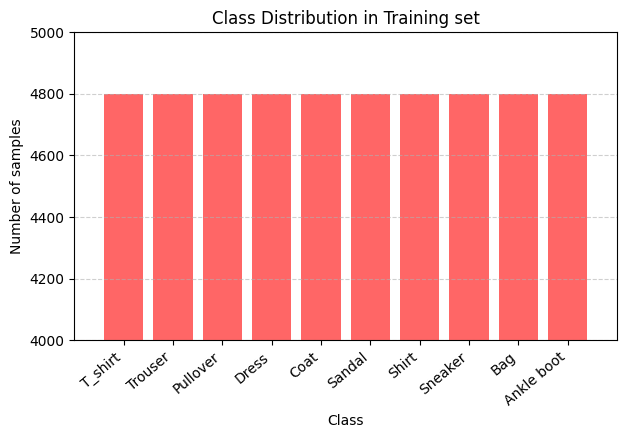

In [8]:
class_names =["T_shirt","Trouser", "Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
unique, counts = np.unique(y_train_full, return_counts=True)
plt.figure(figsize=(7, 4))
plt.bar(unique, counts, color="red" , alpha=0.6)
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.title("Class Distribution in Training set")
plt.xticks(unique, class_names, rotation=40, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.axis((-1,10,4000,5000))
plt.show()

In [14]:
old_global_mean =np.mean(x_train_full, axis=(0,1,2))
old_global_std =np.std(x_train_full, axis=(0,1,2))
print("Global Mean of the pixel values", old_global_mean)
print("Global Standart Deviation of the pixel values", old_global_std)

for class_id in range(10):
    indices = np.where(y_train_full == class_id)[0]
    
    class_images = x_train_full[indices]
    
    mean_intensity = class_images.mean()
    
    print(f"- Mean instensity {class_names[class_id]}: {mean_intensity:.2f}")

Global Mean of the pixel values 72.99447648278061
Global Standart Deviation of the pixel values 90.0593388742391
- Mean instensity T_shirt: 82.85
- Mean instensity Trouser: 56.99
- Mean instensity Pullover: 96.49
- Mean instensity Dress: 66.12
- Mean instensity Coat: 98.10
- Mean instensity Sandal: 34.80
- Mean instensity Shirt: 84.83
- Mean instensity Sneaker: 42.84
- Mean instensity Bag: 90.17
- Mean instensity Ankle boot: 76.76


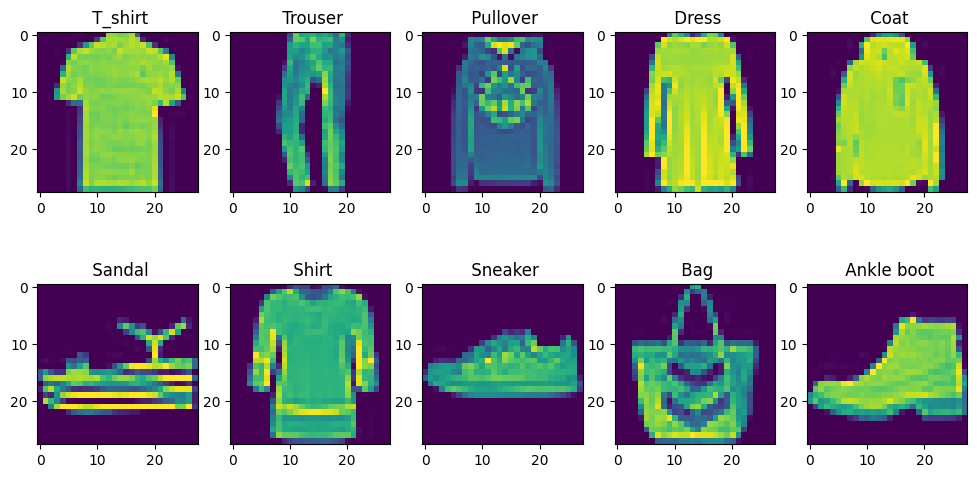

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()
for i in range(10):
    index_of_all_images = np.where(y_train_full == i)
    random_index = np.random.choice(index_of_all_images[0])

    axes[i].imshow(x_train_full[random_index])
    axes[i].set_title(f" {class_names[y_train_full[random_index]]}")
    






<h1><b>Data Normalization</b></h1>

In [18]:
from sklearn.preprocessing import StandardScaler

x_train_full_flat = x_train_full.reshape(x_train_full.shape[0],-1)
x_val_full_flat = x_val_full.reshape(x_val_full.shape[0],-1)
x_test_full_flat = x_test_full.reshape(x_test_full.shape[0],-1)

scalar = StandardScaler()

x_train_scaled = scalar.fit_transform(x_train_full_flat)

x_val_scaled = scalar.transform(x_val_full_flat)

x_test_scaled = scalar.transform(x_test_full_flat)

new_global_mean =np.mean(x_train_scaled,axis=(0,1))
new_global_std = np.std(x_train_scaled,axis=(0,1))
print("New global mean is: ",new_global_mean,"and Old global mean is: ", old_global_mean)

print("New global standart deviation is: ",new_global_std, "and Old global standart deviation is: ", old_global_std)


New global mean is:  -1.0392291713498064e-18 and Old global mean is:  72.99447648278061
New global standart deviation is:  0.9999999999999895 and Old global standart deviation is:  90.0593388742391


<h1>KNN classifier</h1>

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report # useful functions for evaluation

In [41]:
k_values =[1,3,5,7]
best_k = None
best_accuracy = 0
best_metric = ""
accuracies={}

metrics=["euclidean","manhattan"]
for m in metrics:
    accuracies[m] =[]
    for k in k_values:
        knn= KNeighborsClassifier(n_neighbors=k,metric=m)
        knn.fit(x_train_scaled,y_train_full)

        y_val_predict = knn.predict(x_val_scaled)
        accuracy_val = accuracy_score(y_val_full,y_val_predict)
        accuracies[m].append(accuracy_val)
        print(f"Validation accuracy using the metric as \"{m}\" and k={k} is {accuracy_val}")
        if accuracy_val > best_accuracy:
            best_accuracy = accuracy_val
            best_k = k
            best_metric = m

Validation accuracy using the metric as "euclidean" and k=1 is 0.8520833333333333
Validation accuracy using the metric as "euclidean" and k=3 is 0.8553333333333333
Validation accuracy using the metric as "euclidean" and k=5 is 0.8548333333333333
Validation accuracy using the metric as "euclidean" and k=7 is 0.85625
Validation accuracy using the metric as "manhattan" and k=1 is 0.857
Validation accuracy using the metric as "manhattan" and k=3 is 0.8630833333333333
Validation accuracy using the metric as "manhattan" and k=5 is 0.8660833333333333
Validation accuracy using the metric as "manhattan" and k=7 is 0.8643333333333333


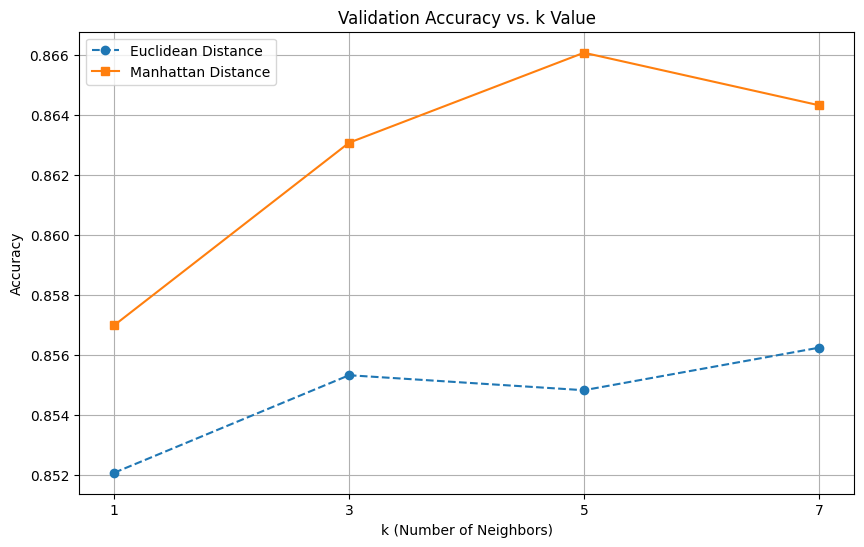

In [43]:
plt.figure(figsize=(10, 6))

plt.plot(k_values, accuracies['euclidean'], marker='o', linestyle='--', label='Euclidean Distance')
plt.plot(k_values, accuracies['manhattan'], marker='s', linestyle='-', label='Manhattan Distance')

plt.title('Validation Accuracy vs. k Value')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')

plt.xticks(k_values)

plt.legend()
plt.grid(True)

plt.show()